---
# <center> **Foundations of Applied Machine Learning**
## <center> Summer 2025

### <center> **Prof. Bahram Mobasher**
### <center> Teaching Assistant: **Sanaz Imanlou** | email: *sanaz.imanlou@email.ucr.edu* | [Course webpage](https://github.com/sanaz007/PHYS_243)
### <center> Week 6 : Clustering
---

In [1]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure)

In [2]:
def Minkowski_d(x1, x2, p=2):
    """ Function from L^p
    This is a function for defining a general distance measure between any 
    given N-dimensional vectors:     x1, x2
    
    INPUT:
    ------
           x1 (list or array of floats) : First vector
           x2 (list or array of floats) : Second vector
           p (float) : The power in our Minkowski definition 
    
    OUTPUT:
    -------
            (float) : The Minkowski distance of power p
                      between x1 and x2 
    """
    
    # Assuming we have a list or an array of numbers
    # Creating a variable for summation
    _sum_=0
    # Now we go through every element on the arrays and
    # will find the distance and add them  
    for x1_, x2_ in zip(x1, x2):
        dummy = pow(abs(x1_-x2_), p)
        _sum_+=dummy
    distance = pow(_sum_, 1/p)
    return distance

In [3]:
class Point:
    def __init__(self, features, label = None, \
                 name = "Unassigned"):
        self.name = name
        self.features = features
        self.label = label
        
    # get the dimensionality of the features
    def get_dimension(self):
        return len(self.features)
    
    def get_features(self):
        return self.features
    
    def get_label(self):
        return self.label
    
    def get_name(self):
        return self.name
    
    def distance_Minkowski(self, other, p = 2):
        return Minkowski_d(self.features, other.get_features(), p)
    distance_Minkowski.__doc__ = Minkowski_d.__doc__
    
    def get_norm(self, p = 2):
        _zero_=[0 for _ in range(self.get_dimension())]
        return Minkowski_d(self.features, _zero_, p)
    
    def __str__(self):
        return self.name +" : "+ str(self.features) + ' : '\
               + str(self.label)

# Classification:

In the last part on clustering we were able to develop our first unsupervised learning algorithm. Here we are going to see how a supervised algorithm works. But first let's talk about _supervised learning_.

## Supervised learning: 

* **Regression**: 
    * Fitting curve to data
    * Finding a Real valued measure for data vector. (features)
    
    
    
* **Classification**:
    * Asscociate each data vector to a label. (N-dimensional vector of features to a discrete value which are the labels.) 

## Nearest Neighbour: 

One of the most commonly used algorithm for classification is **nearest neighbour**. In which you just remember the data you trained on and you will not perform any fancy manipulation on the data. 


Basic algorithm is as follows:

```algorithm
 * Find the nearest example from the training data to the new data.
 
 * Assign the known label of that example to your new data. 
```

Let's imagine the following labeled points in your data set:

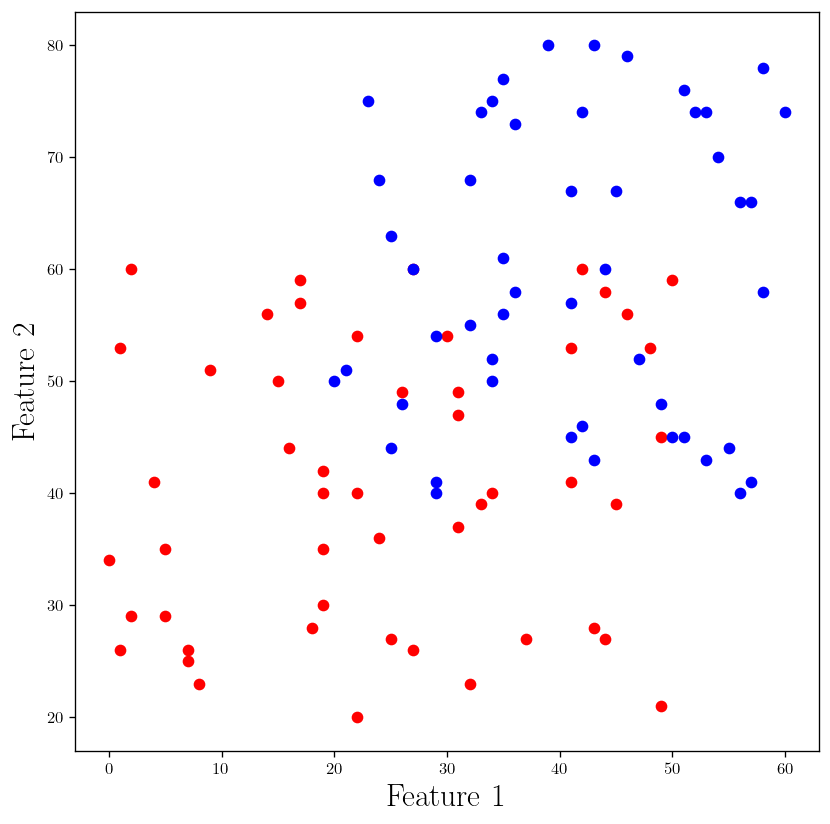

In [4]:
fig_cl_1 = plt.figure(figsize=(8,8))

group_1, group_2 = [], []
random.seed(50)



for i in range(50):
    _p_ = Point([random.randint(0, 50), random.randint(20, 60)], label="red")
    group_1.append(_p_)
    plt.scatter(_p_.get_features()[0], _p_.get_features()[1], color = "r")
    
    
    _p_ = Point([random.randint(20, 60), random.randint(40, 80)], label="blue")
    group_2.append(_p_)
    plt.scatter(_p_.get_features()[0], _p_.get_features()[1], color = "b")

plt.xlabel(r"Feature 1", fontsize = 19)
plt.ylabel(r"Feature 2", fontsize = 19)

plt.show()

Now let's say we have a new data point which we are trying to assign the labels "red" and "blue" to it based on the training data. (data we already have)



The easiest way to deal with that is to consider the label from the **nearest neighbour** in terms of our distant measure.

In [5]:
new_data = [36, 49]

New_data = Point(new_data, label="None")

In [6]:
groups = group_1
groups.extend(group_2)

minimum_distance = New_data.distance_Minkowski(group_1[0])

for point in groups:
    _distance_ = New_data.distance_Minkowski(point)
    
    if _distance_<= minimum_distance:
        minimum_distance = _distance_
        New_data.label = point.get_label()
        print(minimum_distance, New_data.label)

13.0 red
9.219544457292887 red
5.385164807134504 red
5.0 red
3.605551275463989 blue
2.23606797749979 blue


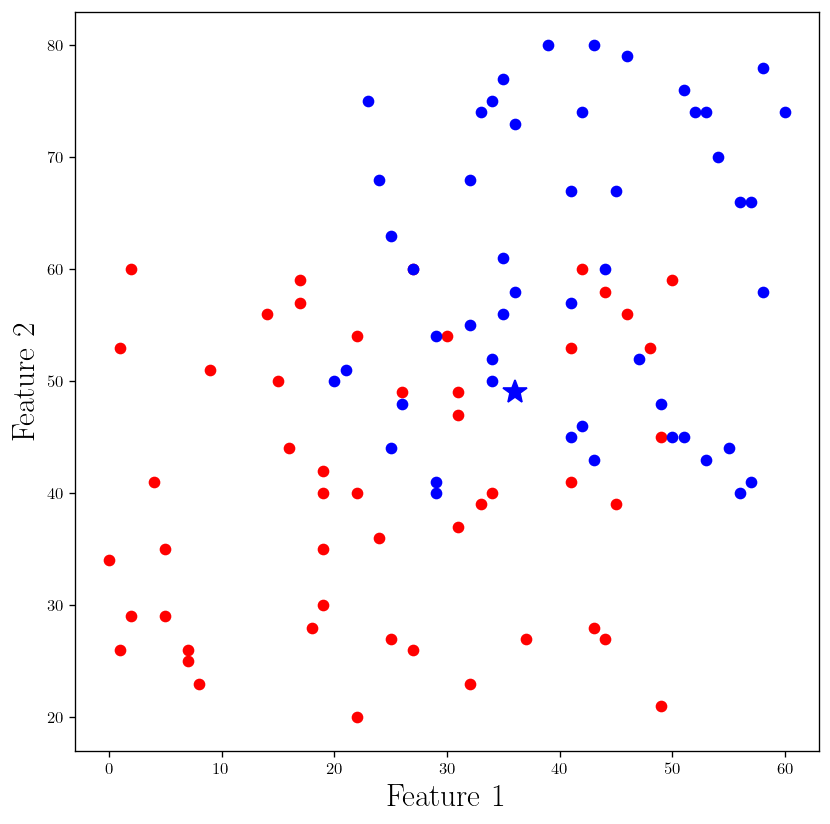

In [7]:
fig_cl_1 = plt.figure(figsize=(8,8))

for point in groups:
    plt.plot(point.get_features()[0], point.get_features()[1], ".", 
             color = point.get_label(), markersize = 12)

    
plt.plot(New_data.get_features()[0], New_data.get_features()[1], "*",
         color = New_data.get_label(), markersize = 15)

plt.xlabel(r"Feature 1", fontsize = 19)
plt.ylabel(r"Feature 2", fontsize = 19)

plt.show()

And you can see with our code we found the nearest element in the data set to our  new data (star) and we assigned the closeset existing label.

This approach has a problem since we only look at the nearest neighbour in which we can mislead us quite easily particularly if we have a noisy data set. For avoiding this issue we will introduce another method: K-Nearest Neighbours (KNN) 